In [41]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Drift diffusion model from class
@njit
def simulate_diffusion(v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates one realization of the diffusion process given
    a set of parameters and a step size `dt`.

    Parameters:
    -----------
    v     : float
        The drift rate (rate of information uptake)
    a     : float
        The boundary separation (decision threshold).
    beta  : float in [0, 1]
        Relative starting point (prior option preferences)
    tau   : float
        Non-decision time (additive constant)
    dt    : float, optional (default: 1e-3 = 0.001)
        The step size for the Euler algorithm.
    scale : float, optional (default: 1.0)
        The scale (sqrt(var)) of the Wiener process. Not considered
        a parameter and typically fixed to either 1.0 or 0.1.
    max_time: float, optional (default: .10)
        The maximum number of seconds before forced termination.

    Returns:
    --------
    (x, c) - a tuple of response time (x - float) and a 
        binary decision (c - int) 
    """

    # Inits (process starts at relative starting point)
    y = beta * a
    num_steps = tau
    const = scale*np.sqrt(dt)

    # Loop through process and check boundary conditions
    while (y <= a and y >= 0) and num_steps <= max_time:

        # Perform diffusion equation
        z = np.random.randn()
        y += v*dt + const*z

        # Increment step counter
        num_steps += dt

    if y >= a:
        c = 1.
    else:
        c = 0.
    return (round(num_steps, 3), c)

@njit
def simulate_diffusion_n(num_sims, v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):

    data = np.zeros((num_sims, 2))
    for n in range(num_sims):
        data[n, :] = simulate_diffusion(v, a, beta, tau, dt, scale, max_time)
    return data

Part 1: Mean Difference

In [7]:
# Create set of suitable params, including 25 different drift rates between 0.5 - 1.5
params = {
    'a': 2,
    'beta': 0.5,
    'tau': 0.5
}

v = np.linspace(0.5, 1.5, 25)

In [28]:
mean_diff_data = np.zeros((25))

In [33]:
# Run DDM for each drift rate v with N=2000
for x in range(25):
    data = simulate_diffusion_n(2000, v[x], **params)
    
    # Split data for each distribution
    data_upper = data[:, 0][data[:, 1] == 1]
    data_lower = data[:, 0][data[:, 1] == 0]

    # Calculate mean difference
    mean_upper = np.sum(data_upper) / data[:, 0][data[:, 1] == 1].shape[0]
    mean_lower = np.sum(data_lower) / data[:, 0][data[:, 1] == 0].shape[0]
    mean_diff = round(np.abs(mean_upper-mean_lower), 3)

    # Add to new array
    mean_diff_data[x] = (mean_diff)

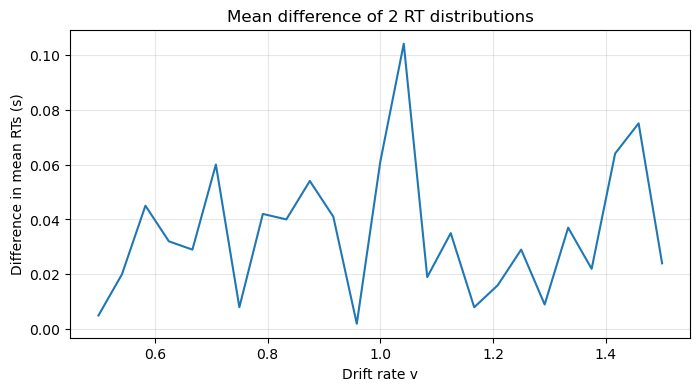

In [93]:
# Plot results for analysis

f, ax = plt.subplots(figsize=(8, 4))
ax.plot(v, mean_diff_data)
ax.set_xlabel('Drift rate v')
ax.set_ylabel('Difference in mean RTs (s)')
ax.set_title('Mean difference of 2 RT distributions')
ax.grid(alpha=0.3)

Part 2: Exploring Parameter Effects on Mean and Standard Deviation

In [96]:
# Varying Drift Rates
params = {
    'a': 2,
    'beta': 0.5,
    'tau': 0.5
}

v = np.linspace(0.5, 1.5, 25)

upper_mean = np.zeros((25))
lower_mean = np.zeros((25))
upper_stdev = np.zeros((25))
lower_stdev = np.zeros((25))

In [97]:
# Run DDM for each drift rate v with N=2000
for x in range(25):
    data = simulate_diffusion_n(2000, v[x], **params)
    
    # Split data for each distribution
    data_upper = data[:, 0][data[:, 1] == 1]
    data_lower = data[:, 0][data[:, 1] == 0]

    # Save data to arrays
    upper_mean[x] = np.mean(data_upper)
    lower_mean[x] = np.mean(data_lower)
    upper_stdev[x] = np.std(data_upper)
    lower_stdev[x] = np.std(data_lower)

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying drift rate v')

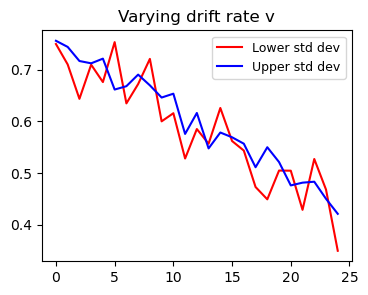

In [98]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_stdev, color='red', label="Lower std dev")
sns.lineplot(upper_stdev, color='blue', label="Upper std dev")
ax.legend(fontsize=9)
ax.set_title('Varying drift rate v')

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying drift rate v')

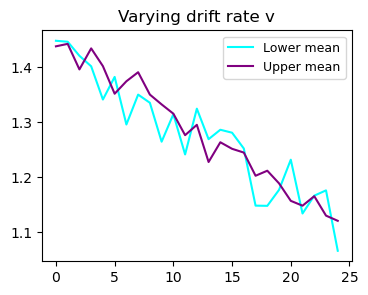

In [99]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_mean, color='aqua', label="Lower mean")
sns.lineplot(upper_mean, color='purple', label="Upper mean")
ax.legend(fontsize=9)
ax.set_title('Varying drift rate v')

In [100]:
# Varying boundary separation
params = {
    'v': 1,
    'beta': 0.5,
    'tau': 0.5
}

a = np.linspace(1, 3, 25)

upper_mean = np.zeros((25))
lower_mean = np.zeros((25))
upper_stdev = np.zeros((25))
lower_stdev = np.zeros((25))

In [101]:
# Run DDM for each a with N=2000
for x in range(25):
    data = simulate_diffusion_n(2000, a=a[x], **params)
    
    # Split data for each distribution
    data_upper = data[:, 0][data[:, 1] == 1]
    data_lower = data[:, 0][data[:, 1] == 0]

    # Save data to arrays
    upper_mean[x] = np.mean(data_upper)
    lower_mean[x] = np.mean(data_lower)
    upper_stdev[x] = np.std(data_upper)
    lower_stdev[x] = np.std(data_lower)

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying boundary separation a')

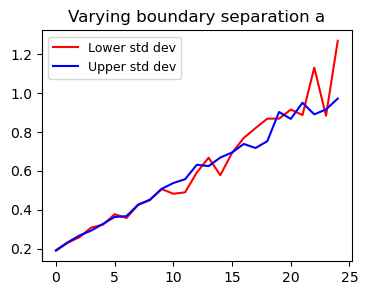

In [102]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_stdev, color='red', label="Lower std dev")
sns.lineplot(upper_stdev, color='blue', label="Upper std dev")
ax.legend(fontsize=9)
ax.set_title('Varying boundary separation a')

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying boundary separation a')

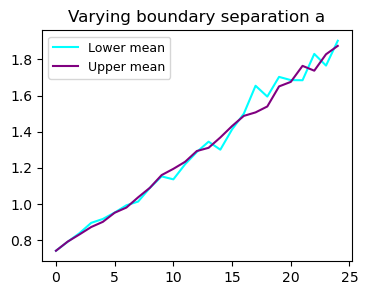

In [103]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_mean, color='aqua', label="Lower mean")
sns.lineplot(upper_mean, color='purple', label="Upper mean")
ax.legend(fontsize=9)
ax.set_title('Varying boundary separation a')

In [110]:
# Varying starting point
params = {
    'v': 1,
    'a': 2,
    'tau': 0.5
}

beta = np.linspace(0.2, 0.7, 25)

upper_mean = np.zeros((25))
lower_mean = np.zeros((25))
upper_stdev = np.zeros((25))
lower_stdev = np.zeros((25))

In [111]:
# Run DDM for each beta with N=2000
for x in range(25):
    data = simulate_diffusion_n(2000, beta=beta[x], **params)
    
    # Split data for each distribution
    data_upper = data[:, 0][data[:, 1] == 1]
    data_lower = data[:, 0][data[:, 1] == 0]

    # Save data to arrays
    upper_mean[x] = np.mean(data_upper)
    lower_mean[x] = np.mean(data_lower)
    upper_stdev[x] = np.std(data_upper)
    lower_stdev[x] = np.std(data_lower)

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying starting point beta')

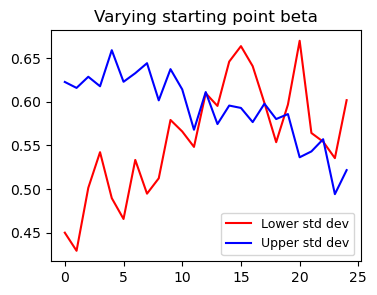

In [112]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_stdev, color='red', label="Lower std dev")
sns.lineplot(upper_stdev, color='blue', label="Upper std dev")
ax.legend(fontsize=9)
ax.set_title('Varying starting point beta')

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying starting point beta')

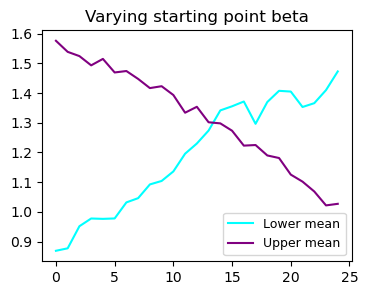

In [113]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_mean, color='aqua', label="Lower mean")
sns.lineplot(upper_mean, color='purple', label="Upper mean")
ax.legend(fontsize=9)
ax.set_title('Varying starting point beta')

In [114]:
# Varying nondecision time
params = {
    'v': 1,
    'a': 2,
    'beta': 0.5
}

tau = np.linspace(0.1, 6, 25)

upper_mean = np.zeros((25))
lower_mean = np.zeros((25))
upper_stdev = np.zeros((25))
lower_stdev = np.zeros((25))

In [115]:
# Run DDM for each beta with N=2000
for x in range(25):
    data = simulate_diffusion_n(2000, tau=tau[x], **params)
    
    # Split data for each distribution
    data_upper = data[:, 0][data[:, 1] == 1]
    data_lower = data[:, 0][data[:, 1] == 0]

    # Save data to arrays
    upper_mean[x] = np.mean(data_upper)
    lower_mean[x] = np.mean(data_lower)
    upper_stdev[x] = np.std(data_upper)
    lower_stdev[x] = np.std(data_lower)

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying nondecision time tau')

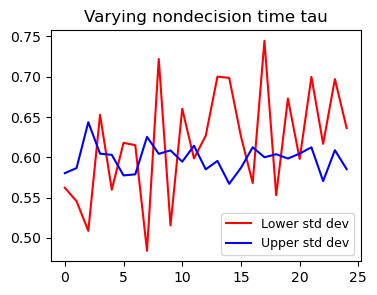

In [116]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_stdev, color='red', label="Lower std dev")
sns.lineplot(upper_stdev, color='blue', label="Upper std dev")
ax.legend(fontsize=9)
ax.set_title('Varying nondecision time tau')

/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/cognitive/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Varying nondecision time tau')

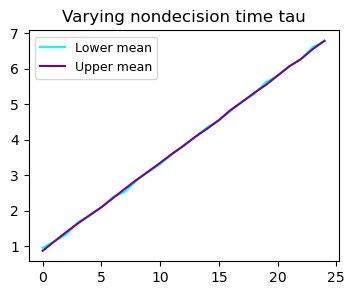

In [117]:
f, ax = plt.subplots(1, 1, figsize=(4,3))
sns.lineplot(lower_mean, color='aqua', label="Lower mean")
sns.lineplot(upper_mean, color='purple', label="Upper mean")
ax.legend(fontsize=9)
ax.set_title('Varying nondecision time tau')